In [1]:
import folium
m = folium.Map([50.6, -1.3], zoom_start=10)
boundsdata = r'bounds_IOW.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [9]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

user = 'yutsuo' ## change this!
password = 'Z9lj3uak' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

POLYGON((-1.5905 50.7739,-1.5819 50.5371,-1.0038 50.5353,-1.0104 50.7757,-1.5905 50.7739))


In [10]:
products = api.query(footprint,
                     date = ('20190225', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [11]:
print(products)

OrderedDict([('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04', {'summary': 'Date: 2019-02-26T11:10:49.024Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 1023.42 MB', 'ingestiondate': datetime.datetime(2019, 2, 27, 0, 35, 3, 682000), 'instrumentname': 'Multi-Spectral Instrument', 'highprobacloudspercentage': 0.03139, 'identifier': 'S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349', 'uuid': '30b9e88b-94a7-45ec-9ceb-4fa8bf86be04', 'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/", 's2datatakeid': 'GS2B_20190226T111049_010316_N02.11', 'producttype': 'S2MSI2A', 'processinglevel': 'Level-2A', 'format': 'SAFE', 'snowicepercentage': 0.0029, 'beginposition': datetime.datetime(2019, 2, 26, 11, 10, 49, 24000), 'platformserialidentifier': 'Sentinel-2B', 'unclassifiedpercentage': 1.8601610000000002, 'orbitdirection': 'DESCENDING', 'cloudcoverpercentage': 0.100021, 'relativeorbitnumber': 137, 'endposition': datetime.datetim

In [12]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

09a3b3c8-1223-4133-9f2d-dbb8efd9028b    Annotation(-2.23334, 50.0551, '09a3b3c8-1223-4...
29625327-bc7a-44c4-be47-4cfa2828a760    Annotation(-0.836784, 50.0375, '29625327-bc7a-...
30b9e88b-94a7-45ec-9ceb-4fa8bf86be04    Annotation(-0.795352, 50.9358, '30b9e88b-94a7-...
40128149-82fa-4d83-84a9-37155856ba6d    Annotation(-2.21863, 50.954, '40128149-82fa-4d...
dtype: object

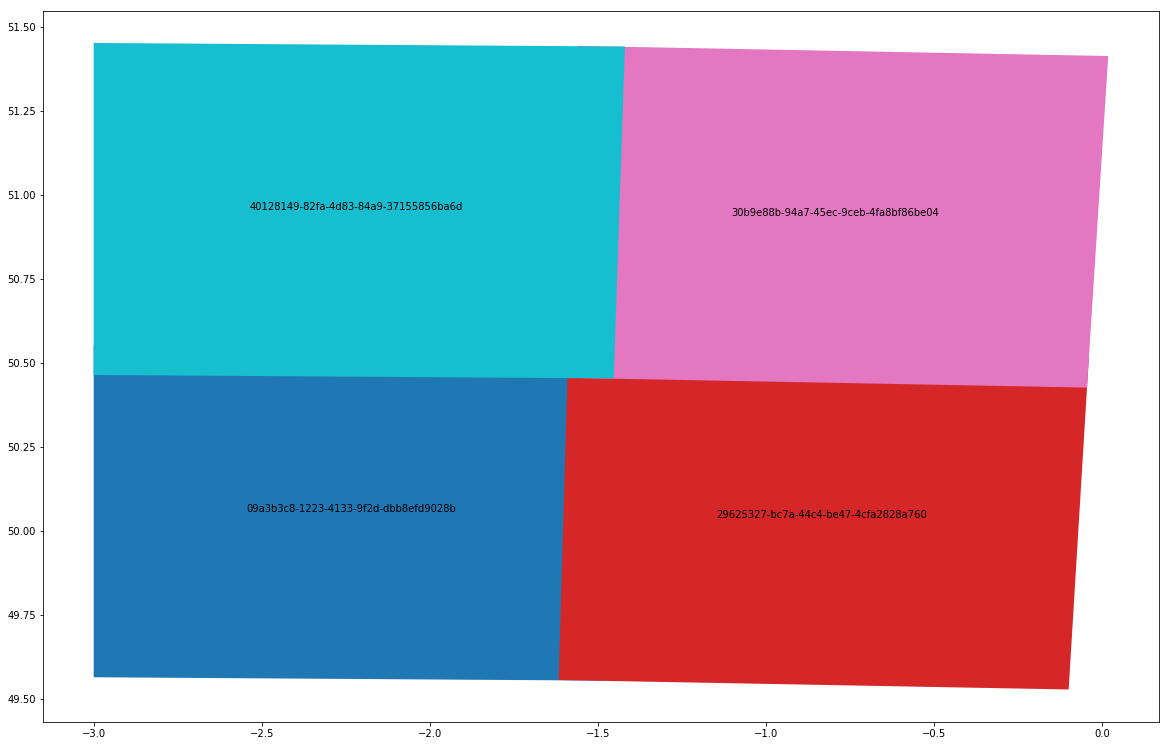

In [13]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

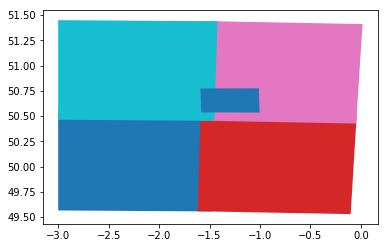

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [21]:
api.download('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')

Downloading: 100%|██████████| 1.07G/1.07G [45:16<00:00, 460kB/s]  
MD5 checksumming: 100%|██████████| 1.07G/1.07G [00:02<00:00, 373MB/s]


{'Creation Date': datetime.datetime(2019, 2, 27, 0, 47, 32, 672000),
 'Ingestion Date': datetime.datetime(2019, 2, 27, 0, 35, 3, 682000),
 'Online': True,
 'date': datetime.datetime(2019, 2, 26, 11, 10, 49, 24000),
 'downloaded_bytes': 1073194791,
 'footprint': 'POLYGON((-1.5611267 51.44235231685392,0.017025008525814 51.41234265506691,-0.046142578 50.42629366061962,-1.5912781 50.45527216066188,-1.5611267 51.44235231685392))',
 'id': '30b9e88b-94a7-45ec-9ceb-4fa8bf86be04',
 'md5': 'BEDF8F60B10A030B54EF6710642A46C2',
 'path': './S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.zip',
 'size': 1073194791,
 'title': 'S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('30b9e88b-94a7-45ec-9ceb-4fa8bf86be04')/$value"}

In [24]:
!mkdir ./sentinelsat

In [39]:
import zipfile

path_to_zip_file='S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.zip'
directory_to_extract_to=r'./sentinelsat'

zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [35]:
!/sbin/ip route|awk '/default/ { print $3 }'

172.17.0.1


In [47]:
TCI_jp2='/notebooks/sentinelsat/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE/GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_TCI_10m.jp2'
B02_jp2='/notebooks/sentinelsat/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE/GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/T30UXB_20190226T111049_B02_10m.jp2'

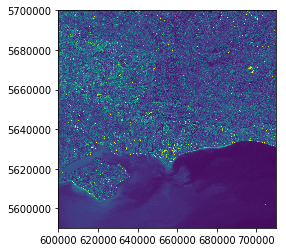

In [48]:
import rasterio
from rasterio.plot import show
TCI = rasterio.open(TCI_jp2)
show(TCI)

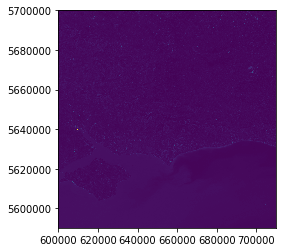

In [49]:
B02 = rasterio.open(B02_jp2)
show(B02)